___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Linear Regression Project Exercise 

Now that we have learned about feature engineering, cross validation, and grid search, let's test all your new skills with a project exercise in Machine Learning. This exercise will have a more guided approach, later on the ML projects will begin to be more open-ended. We'll start off with using the final version of the Ames Housing dataset we worked on through the feature engineering section of the course. Your goal will be to create a Linear Regression Model, train it on the data with the optimal parameters using a grid search, and then evaluate the model's capabilities on a test set.

---
---
---
## Complete the tasks in bold

**TASK: Run the cells under the Imports and Data section to make sure you have imported the correct general libraries as well as the correct datasets. Later on you may need to run further imports from scikit-learn.**

### Imports

In [2]:
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns

### Data

In [5]:
df = pl.read_csv("../../DATA/AMES_Final_DF.csv")

In [6]:
df.head()

Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS SubClass_150,…,Fireplace Qu_Po,Fireplace Qu_TA,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_None,Garage Qual_Po,Garage Qual_TA,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_None,Garage Cond_Po,Garage Cond_TA,Paved Drive_P,Paved Drive_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
f64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,…,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,0,…,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,0,…,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,0,…,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,0,…,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,0,…,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [8]:
df.schema

Schema([('Lot Frontage', Float64),
        ('Lot Area', Int64),
        ('Overall Qual', Int64),
        ('Overall Cond', Int64),
        ('Year Built', Int64),
        ('Year Remod/Add', Int64),
        ('Mas Vnr Area', Float64),
        ('BsmtFin SF 1', Float64),
        ('BsmtFin SF 2', Float64),
        ('Bsmt Unf SF', Float64),
        ('Total Bsmt SF', Float64),
        ('1st Flr SF', Int64),
        ('2nd Flr SF', Int64),
        ('Low Qual Fin SF', Int64),
        ('Gr Liv Area', Int64),
        ('Bsmt Full Bath', Float64),
        ('Bsmt Half Bath', Float64),
        ('Full Bath', Int64),
        ('Half Bath', Int64),
        ('Bedroom AbvGr', Int64),
        ('Kitchen AbvGr', Int64),
        ('TotRms AbvGrd', Int64),
        ('Fireplaces', Int64),
        ('Garage Yr Blt', Float64),
        ('Garage Cars', Float64),
        ('Garage Area', Float64),
        ('Wood Deck SF', Int64),
        ('Open Porch SF', Int64),
        ('Enclosed Porch', Int64),
        ('3Ssn Porch', Int

**TASK: The label we are trying to predict is the SalePrice column. Separate out the data into X features and y labels**

In [12]:
X = df.select(cs.exclude("SalePrice"))
y = df.select("SalePrice")

**TASK: Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%. To get the same data split as the solutions notebook, you can specify random_state = 101**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)

**TASK: The dataset features has a variety of scales and units. For optimal regression performance, scale the X features. Take carefuly note of what to use for .fit() vs what to use for .transform()**

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train, y_train)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**TASK: We will use an Elastic Net model. Create an instance of default ElasticNet model with scikit-learn**

In [20]:
from sklearn.linear_model import ElasticNet

In [21]:
elastic_model = ElasticNet()

**TASK:  The Elastic Net model has two main parameters, alpha and the L1 ratio. Create a dictionary parameter grid of values for the ElasticNet. Feel free to play around with these values, keep in mind, you may not match up exactly with the solution choices**

In [22]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25, 50, 100],
    'l1_ratio': [.0001, .001, .01, .1, .5, .75, .9, .95, .99, 1]
}

**TASK: Using scikit-learn create a GridSearchCV object and run a grid search for the best parameters for your model based on your scaled training data. [In case you are curious about the warnings you may recieve for certain parameter combinations](https://stackoverflow.com/questions/20681864/lasso-on-sklearn-does-not-converge)**

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
grid_model = GridSearchCV(
    estimator=elastic_model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    verbose=2,
)

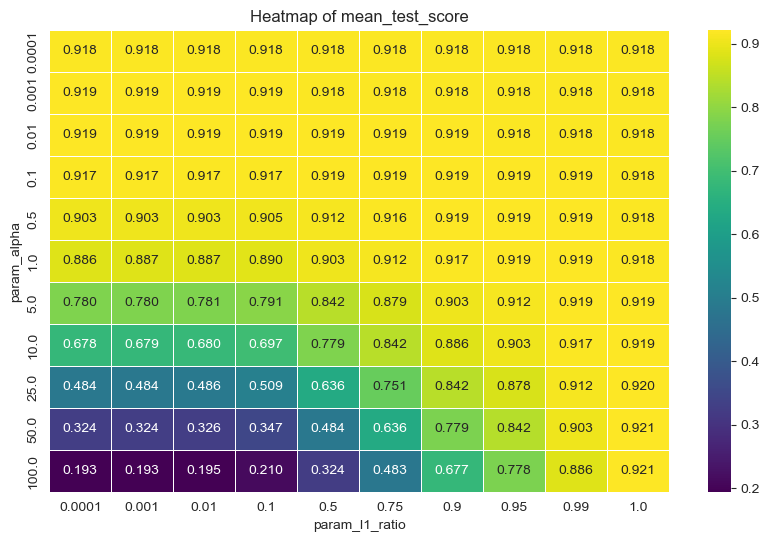

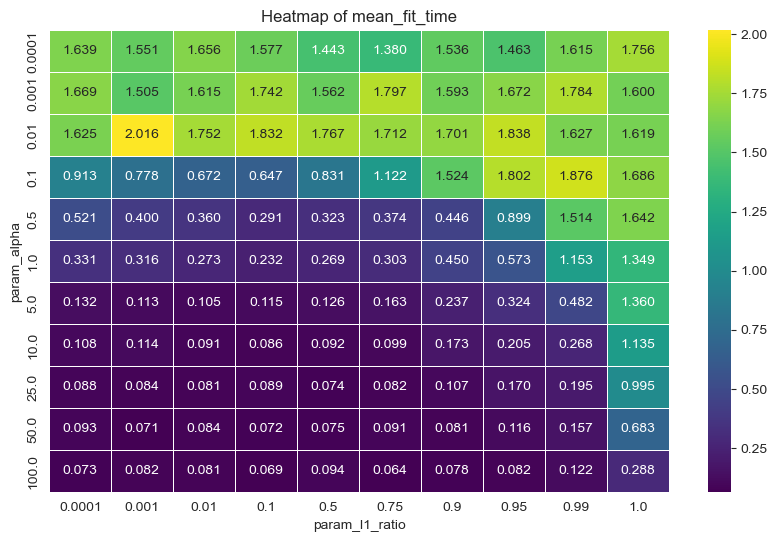

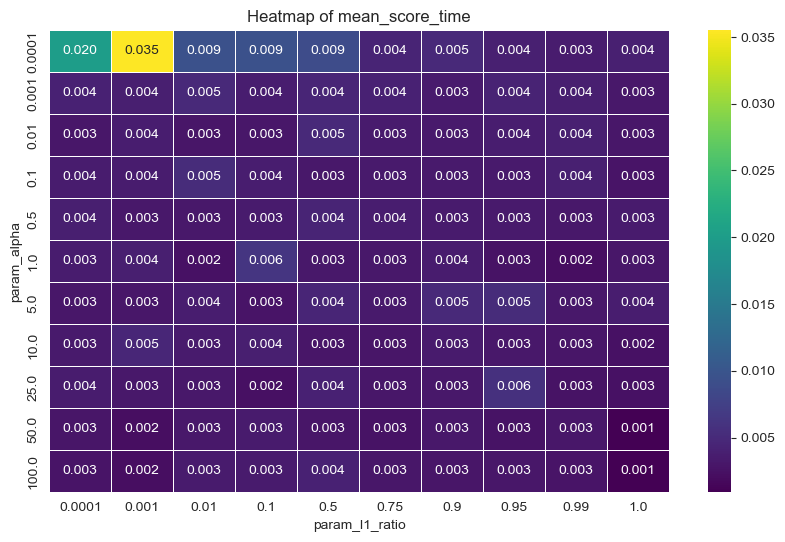

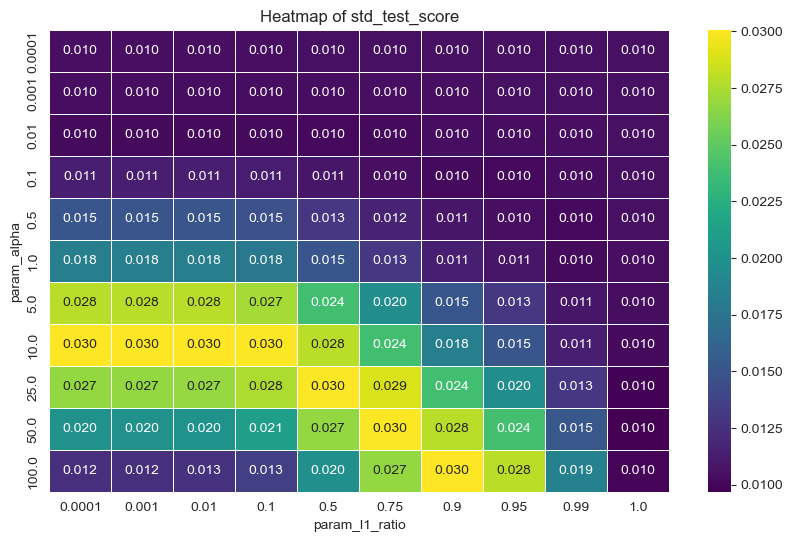

In [28]:
import pandas as pd

# Assuming 'grid_model' is already fitted
results = grid_model.cv_results_

results_df = pd.DataFrame(results)


def plot_heatmap(index, columns, values):
    pivot_table = results_df.pivot(index=index, columns=columns, values=values)
    plt.figure(figsize=(10, 6))  # Adjust size as needed
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis", linewidths=.5)
    plt.title(f"Heatmap of {values}")
    plt.xlabel(columns)
    plt.ylabel(index)
    plt.show()


plot_heatmap('param_alpha', 'param_l1_ratio', 'mean_test_score')
plot_heatmap('param_alpha', 'param_l1_ratio', 'mean_fit_time')
plot_heatmap('param_alpha', 'param_l1_ratio', 'mean_score_time')
plot_heatmap('param_alpha', 'param_l1_ratio', 'std_test_score')


In [25]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 110 candidates, totalling 550 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 25,
                                   50, 100],
                         'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.5, 0.75, 0.9,
                                      0.95, 0.99, 1]},
             verbose=2)

**TASK: Display the best combination of parameters for your model**

In [26]:
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

**TASK: Evaluate your model's performance on the unseen 10% scaled test set. In the solutions notebook we achieved an MAE of $\$$14149 and a RMSE of $\$$20532**

In [29]:
y_pred = grid_model.predict(scaled_X_test)

In [33]:
pl.DataFrame(y_pred, schema=y_test.columns)

SalePrice
f64
115030.010883
330700.153727
201207.127314
196378.724
102219.743191
…
136881.980872
141489.779793
283482.35043


In [42]:
pl.Series(y_pred)

""
f64
115030.010883
330700.153727
201207.127314
196378.724
102219.743191
…
136881.980872
141489.779793
283482.35043


In [46]:
pl.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'Error': y_test - pl.Series(y_pred),
})

y_test,y_pred,Error
i64,f64,f64
125500,115030.010883,10469.989117
320000,330700.153727,-10700.153727
212109,201207.127314,10901.872686
185088,196378.724,-11290.724
102000,102219.743191,-219.743191
…,…,…
140500,136881.980872,3618.019128
147500,141489.779793,6010.220207
289000,283482.35043,5517.64957


In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [51]:
MAE = mean_absolute_error(y_test, y_pred)
RMSE = root_mean_squared_error(y_test, y_pred)

print(f"MAE: {MAE} \n RMSE: {RMSE}")

MAE: 14195.354900562166 
 RMSE: 20558.508566893153


14149.055026374837

20532.890234901013

## Great work!

----